In [1]:
import tensorflow as tf
tf.__version__

'2.15.1'

In [2]:
import os
import sys
import numpy as np
import pandas as pd

from collections.abc import Callable
from typing import Literal

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
##from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix is not working.
##directly copied the above functions from helper.py
def fn_plot_tf_hist(hist_df):
    
    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index 
            so that even if the column names are different it will not throw exceptions.
    '''
        
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm
    
    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]
    
    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot
    
    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)
    
    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0
    
    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)
    
    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow
    
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()
    

In [4]:
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth 
        y_pred : Predictions
        labels : dictonary 
                  {0: 'Goal Keeper', 
                  1: 'Defender', 
                  2: 'Mid-Fielder', 
                  3: 'Forward'}
    
    '''
    
    cm  = confusion_matrix(y_true, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())
    
    fig, ax = plt.subplots(figsize = (6,6))
    
    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();

In [5]:
print(fn_plot_tf_hist.__doc__)  ##used to access comments from a python file


    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index 
            so that even if the column names are different it will not throw exceptions.
    


In [6]:
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 100 # number of epochs
BATCH_SIZE = 256
ALPHA = 0.1 # learning rate
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [7]:
data_df = pd.read_csv("fifa_2019.csv")
data_df.shape

(18207, 89)

In [8]:
#for col in data_df.columns:
    #print(f'{col}: {data_df[col].unique()}')  #to see the unique values in each of the columns

In [9]:
data_df.describe().T  #Take transpose to see all the columns

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [10]:
#data_df['Position'].isnull().sum()

In [11]:
# removing rows with position = null
data_df = data_df[data_df["Position"].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Following columns appear to be relevant for our analysis
rel_cols = ["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [13]:
goalkeeper = 'GK'
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS','LS', 'CF']
midfielder = ['CM','RCM','LCM', 'CDM','RDM','LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [14]:
#Assign labels to goalkeepers
data_df.loc[data_df["Position"] == "GK", "Position"] = 0

#Defenders
data_df.loc[data_df["Position"].isin(defender), "Position"] = 1

#Midfielders
data_df.loc[data_df["Position"].isin(midfielder), "Position"] = 2

#Forward
data_df.loc[data_df["Position"].isin(forward), "Position"] = 3

# Convert Column "Position" to numeric so that Pandas does not complain
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast="integer")

In [15]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [16]:
class_labels = {0: 'Goal Keeper', 1: 'Defender', 2: 'Mid-Fielder', 3: 'Forward'}

In [17]:
y = data_df["Position"].to_numpy()

X = data_df.drop("Position", axis = 1)

In [18]:
# splitting in train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                     stratify=y,
                                     test_size=TEST_SIZE, 
                                     random_state=RANDOM_STATE )
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14517, 33), (3630, 33), (14517,), (3630,))

In [19]:
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Converting to Datasets

In [20]:
#Creating original dataframe into tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))

test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

# Preprocessing and Batching

In [21]:
#Shuffle and batch the dataset
train_ds = train_ds.shuffle(buffer_size=X_train.shape[0]).batch(BATCH_SIZE)

test_ds = test_ds.shuffle(buffer_size=X_test.shape[0]).batch(BATCH_SIZE)

In [22]:
#Optimize for performance
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE) #optimize the entire system for performance

test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
for features, labels in train_ds.take(1):
    print(features.shape, labels.shape)

(256, 33) (256,)


In [24]:
next(iter(train_ds))

(<tf.Tensor: shape=(256, 33), dtype=float64, numpy=
 array([[ 0.9976036 , -0.4741998 ,  0.49712754, ..., -0.31676557,
         -0.37520054, -0.26265265],
        [ 1.56094639, -0.53172191,  1.24477827, ..., -0.07388032,
         -0.43407708, -0.42990836],
        [ 1.10002956,  0.1010213 ,  0.4291593 , ..., -0.62037214,
         -0.25744747, -0.03964503],
        ...,
        [ 0.79275168,  0.33110974,  0.08931806, ..., -0.4382082 ,
         -0.19857093, -0.20690075],
        [ 1.15124254, -0.58924402,  0.83696878, ..., -0.31676557,
         -0.13969439, -0.15114884],
        [ 0.94639062,  0.73376451,  0.49712754, ..., -0.013159  ,
         -0.61070669, -0.20690075]])>,
 <tf.Tensor: shape=(256,), dtype=int8, numpy=
 array([2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1, 2, 2, 0, 3, 3, 1, 2, 1, 1,
        3, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3,
        2, 3, 1, 2, 3, 2, 2, 2, 3, 2, 1, 0, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1,
        1, 1, 3, 2, 1, 0, 1, 1, 0, 1, 2, 3, 2, 1, 1,

# Prepare Model

Functional API

In [25]:
inputs=tf.keras.Input(shape=(33,))

x=tf.keras.layers.Dense(18, activation=tf.nn.relu)(inputs)

outputs=tf.keras.layers.Dense(4)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [26]:
predictions= model(features).numpy()
predictions.shape

(256, 4)

In [27]:
predictions[0].sum()

3.3587232

In [28]:
tf.nn.softmax(predictions).numpy()[0] #converts logits to probabilities for each class

array([0.23279445, 0.31702763, 0.20883927, 0.24133867], dtype=float32)

In [29]:
tf.nn.softmax(predictions).numpy().sum(axis=1)[0]

1.0

In [30]:
model.summary()

'''
Number of parameters:
layer 1 : 33*18 +18 = 612 
    layer 2 : 18*4 + 4
We are not locking any layer hence all parameter are trainable   
'''

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense (Dense)               (None, 18)                612       
                                                                 
 dense_1 (Dense)             (None, 4)                 76        
                                                                 
Total params: 688 (2.69 KB)
Trainable params: 688 (2.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


'\nNumber of parameters:\nlayer 1 : 33*18 +18 = 612 \n    layer 2 : 18*4 + 4\nWe are not locking any layer hence all parameter are trainable   \n'

# Loss Function

In [31]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [32]:
labels

<tf.Tensor: shape=(256,), dtype=int8, numpy=
array([1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2,
       3, 3, 2, 3, 2, 1, 1, 3, 2, 2, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 0, 3,
       1, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 2, 0, 1, 1, 1, 1, 1, 2, 0, 3, 2,
       2, 1, 1, 3, 2, 0, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 3, 2, 1, 3, 3, 2, 2, 3, 2,
       1, 3, 1, 1, 0, 3, 2, 1, 1, 0, 1, 2, 0, 2, 1, 3, 2, 2, 3, 3, 1, 1,
       2, 1, 3, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 0, 2,
       0, 1, 3, 0, 2, 2, 2, 2, 0, 1, 3, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2,
       0, 3, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2,
       2, 0, 3, 2, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       2, 3, 2, 3, 2, 0, 0, 1, 2, 2, 1, 2, 1, 3], dtype=int8)>

In [33]:
loss_fn(labels, predictions).numpy()

1.6344104

In [34]:
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

In [35]:
history=model.fit(train_ds,
                 validation_data=test_ds,
                 epochs=EPOCHS)

Epoch 1/100


57/57 [==============================] - 2s 8ms/step - loss: 1.0376 - accuracy: 0.6047 - val_loss: 0.7001 - val_accuracy: 0.7579
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.8127
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8280 - val_loss: 0.4279 - val_accuracy: 0.8311
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8413 - val_loss: 0.3915 - val_accuracy: 0.8405
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8491 - val_loss: 0.3694 - val_accuracy: 0.8474
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8554 - val_loss: 0.3544 - val_accuracy: 0.8518
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8611 - val_loss: 0.3438 - val_accuracy: 0.8551
Epoch 8/100

Epoch 56/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2764 - accuracy: 0.8876 - val_loss: 0.2971 - val_accuracy: 0.8769
Epoch 57/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.8874 - val_loss: 0.2970 - val_accuracy: 0.8769
Epoch 58/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.8875 - val_loss: 0.2968 - val_accuracy: 0.8766
Epoch 59/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.8876 - val_loss: 0.2968 - val_accuracy: 0.8769
Epoch 60/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8875 - val_loss: 0.2966 - val_accuracy: 0.8769
Epoch 61/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8874 - val_loss: 0.2965 - val_accuracy: 0.8763
Epoch 62/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.8872 - val_loss: 0.2964 - val_accuracy: 0.8760
Epoch 

In [36]:
model.evaluate(test_ds, verbose=2)

15/15 - 0s - loss: 0.2968 - accuracy: 0.8755 - 49ms/epoch - 3ms/step


[0.29676640033721924, 0.8754820823669434]

In [37]:
loss_df=pd.DataFrame(history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.037576,0.604670,0.700078,0.757851
1,0.586533,0.795137,0.503354,0.812672
2,0.458019,0.827995,0.427870,0.831129
3,0.403575,0.841290,0.391483,0.840496
4,0.374475,0.849074,0.369415,0.847383


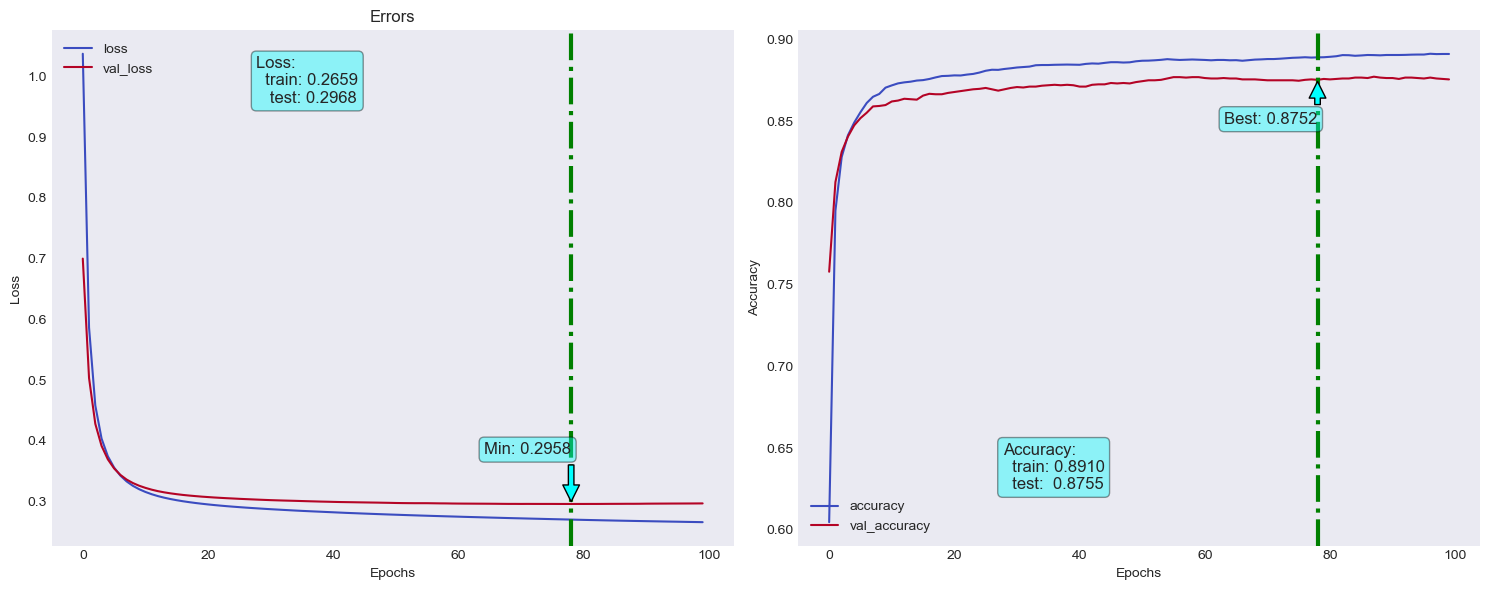

In [38]:
fn_plot_tf_hist(loss_df)

In [39]:
loss_df[loss_df['val_loss'] == loss_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
78,0.270127,0.888958,0.295844,0.875207


# Predictions

In [40]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [41]:
y_true, pred = [], []
for features, labels in train_ds:
    y_pred = probability_model(features).numpy()
    pred.extend(y_pred)
    y_true.extend(labels)
y_pred.shape

(181, 4)

In [42]:
y_pred = probability_model(X_test).numpy()

print('Accuracy score on Test Data :{:.5f}'.format(accuracy_score(y_test, 
                                                                  np.argmax(y_pred, axis = 1))))

Accuracy score on Test Data :0.87548


In [43]:
print(classification_report(y_test, 
                            np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.92      0.92      0.92      1173
           2       0.82      0.86      0.84      1368
           3       0.83      0.75      0.79       684

    accuracy                           0.88      3630
   macro avg       0.89      0.88      0.89      3630
weighted avg       0.88      0.88      0.88      3630



In [44]:
y_pred = probability_model(X_test).numpy()

print('Accuracy score on Test Data :{:.5f}'.format(accuracy_score(y_test, 
                                                                  np.argmax(y_pred, axis = 1))))

Accuracy score on Test Data :0.87548


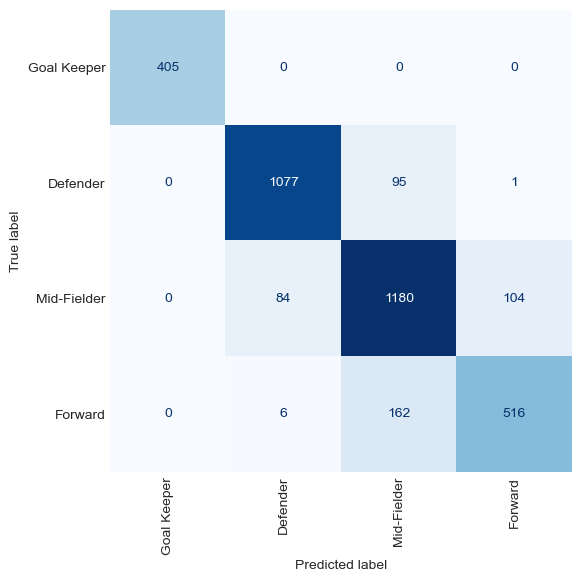

In [45]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis=1),labels=class_labels)